In [3]:
import os
import glob
import numpy as np
import csv
import librosa

import matplotlib.pyplot as plt

In [17]:
train_class_instance_num_dict = dict()
valid_class_instance_num_dict = dict()

train_class_instance_len_dict = dict()
valid_class_instance_len_dict = dict()


def get_statistics(target):

    class_instance_num_dict = dict()
    class_instance_len_dict = dict()
    
    classes = os.listdir(target)
    classes.sort()

    for class_ in classes:
        class_instance_num_dict[class_] = 0
        class_instance_len_dict[class_] = []

        wav_files = os.listdir(os.path.join(target, class_))

        class_instance_num_dict[class_] = len(wav_files)

        for wav_file in wav_files:
            sec = librosa.get_duration(filename=target + '/' + class_ + '/' + wav_file)
            class_instance_len_dict[class_].append(sec)


    return class_instance_num_dict, class_instance_len_dict
    

In [18]:
train_class_instance_num_dict, train_class_instance_len_dict = get_statistics('train')

In [19]:
valid_class_instance_num_dict, valid_class_instance_len_dict = get_statistics('valid')

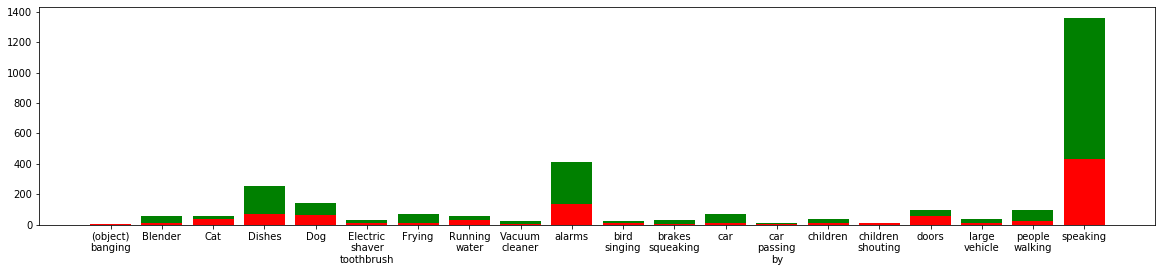

In [20]:
plt.figure(figsize=(20, 4))
key_list = list(train_class_instance_num_dict.keys())

for i, key in enumerate(key_list):
    key_list[i] = key.replace('_', '\n').replace(' ', '\n')

fig = plt.bar(key_list, train_class_instance_num_dict.values(), 0.8, color='g')
fig = plt.bar(key_list, valid_class_instance_num_dict.values(), 0.8, color='r')

plt.show()

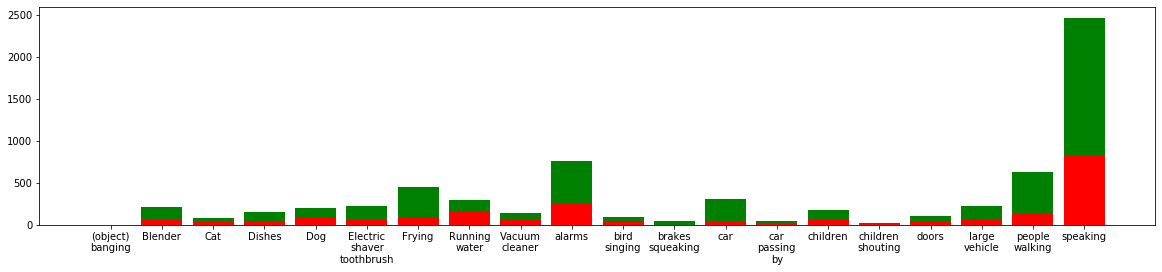

In [25]:
plt.figure(figsize=(20, 4))
key_list = list(train_class_instance_num_dict.keys())

for i, key in enumerate(key_list):
    key_list[i] = key.replace('_', '\n').replace(' ', '\n')

fig = plt.bar(key_list, list(map(np.sum, list(train_class_instance_len_dict.values()))), 0.8, color='g')
fig = plt.bar(key_list, list(map(np.sum, list(valid_class_instance_len_dict.values()))), 0.8, color='r')

plt.show()

In [30]:
total_file_len_list = list()

for class_file_len_list in list(train_class_instance_len_dict.values()):
    total_file_len_list += class_file_len_list
    
for class_file_len_listt in list(valid_class_instance_len_dict.values()):
    total_file_len_list += class_file_len_list

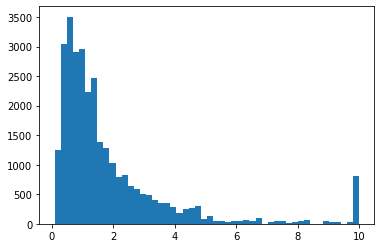

In [37]:
plt.figure()
plt.hist(total_file_len_list, bins=50)
plt.show()